# 4.3.1 Matriz de confusión

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Es una matriz que permite visualizar el desempeño de un clasificador. <br>
La organización típica es la presentada a continuación:

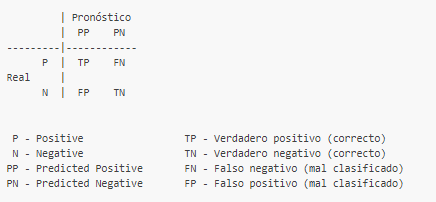



In [ ]:
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#
#         | Pronostico
#         |   0    1
# --------|-----------
#       0 |  10    1
# Real    |
#       1 |   3    1
#

confusion_matrix(
    # -------------------------------------------------------------------------
    # Ground truth (correct) target values.
    y_true=y_true,
    # -------------------------------------------------------------------------
    # Estimated targets as returned by a classifier.
    y_pred=y_pred,
    # -------------------------------------------------------------------------
    # List of labels to index the matrix.
    labels=None,
    # -------------------------------------------------------------------------
    # Normalizes confusion matrix over the true (rows), predicted (columns)
    # conditions or all the population.
    # 'true', 'pred', 'all'
    normalize=None,
)

In [ ]:
confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    labels=[1, 0],
    normalize=None,
)

In [ ]:
pd.DataFrame(
    confusion_matrix(
        y_true=y_true,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=["PP=1", "PF=0"],
    index=["P=1", "F=0"],
)

#
#          | Pronóstico
#          |  PP    PN
# ---------|------------
#       P  |  TP    FN
# Real     |
#       N  |  FP    TN
#

In [ ]:
#
# Extracción de los elementos de la matriz de confusión
#
tn, fp, fn, tp = confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
).ravel()

display(
    tn,
    fp,
    fn,
    tp,
)

## 4.3.1.1 Matriz de confusión para más de dos clases

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
print(disp.confusion_matrix)

plt.show()

## 4.3.1.2 Normalización

In [ ]:
#
# Normalización sobre las filas (true)
#
ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize="true",
)
plt.show()

In [ ]:
#
# Normalización sobre las columnas (pred)
#
ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize="pred",
)
plt.show()

In [ ]:
#
# Normalización sobre todos los datos
#
ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize="all",
)
plt.show()

In [ ]:
print('ok_')